In [1]:
# from coffea.nanoevents import TreeMakerSchema, BaseSchema, NanoEventsFactory
# from fit_functions import fit_unbinned_double_gauss_Z, fit_unbinned_gauss_Z_with_background
import matplotlib.pyplot as plt
import uproot as up
import numpy as np
import awkward as ak
import mplhep as hep
hep.style.use(hep.style.CMS)
import ROOT

Welcome to JupyROOT 6.26/10


In [2]:
dataset = '../outputs/Run3_All.root'
file = up.open(dataset)

In [11]:
events = file['ntuple;1']
columns = ['B_Ups1_mass', 'B_Ups2_mass', 'FourL_mass']
branches = events.arrays(columns)

In [ ]:
events.keys()

In [5]:
def print_summary(data, text):
    events = len(data)
    candidates = np.sum(ak.num(branches['B_J1_mass'], axis=1))

    print(f"Number of candidates {text}: {candidates}")
    print(f"Number of events {text}: {events}")

In [6]:
print_summary(branches, 'Preselection')

Number of candidates Preselection: 150
Number of events Preselection: 1


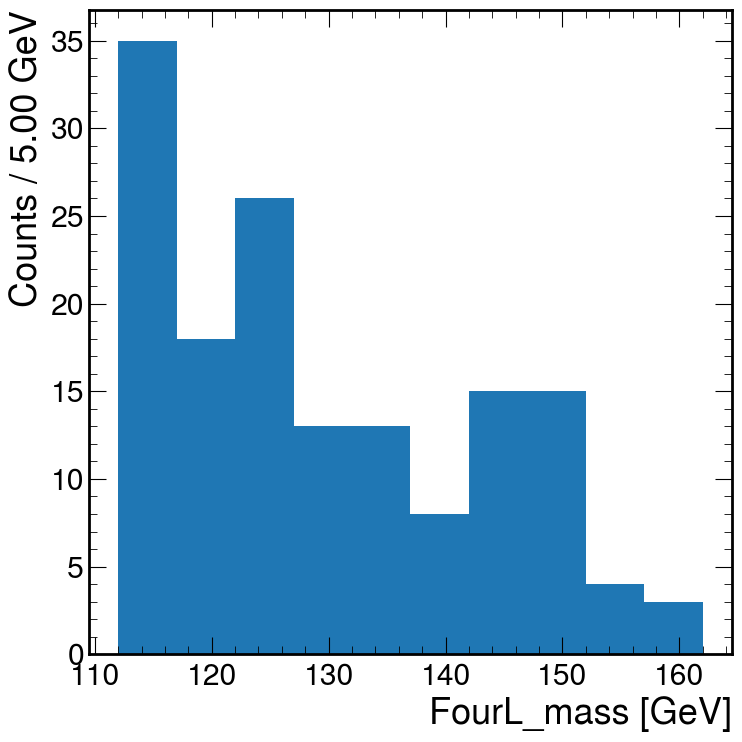

In [12]:
plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 10, 112, 162
plt.hist(ak.flatten(branches['FourL_mass']), bins=nbins, range=(xlow, xhigh))
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.xlabel("FourL_mass [GeV]")
plt.tight_layout()

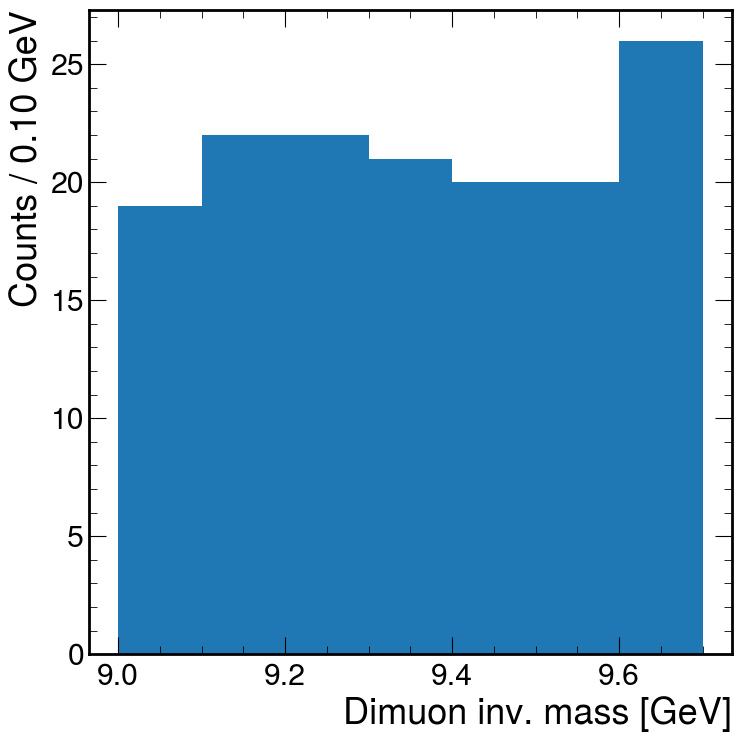

In [22]:
plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 7, 9, 9.7
plt.hist(ak.flatten(branches['B_Ups1_mass']), bins=nbins, range=(xlow, xhigh))
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.xlabel("Dimuon inv. mass [GeV]")
plt.tight_layout()

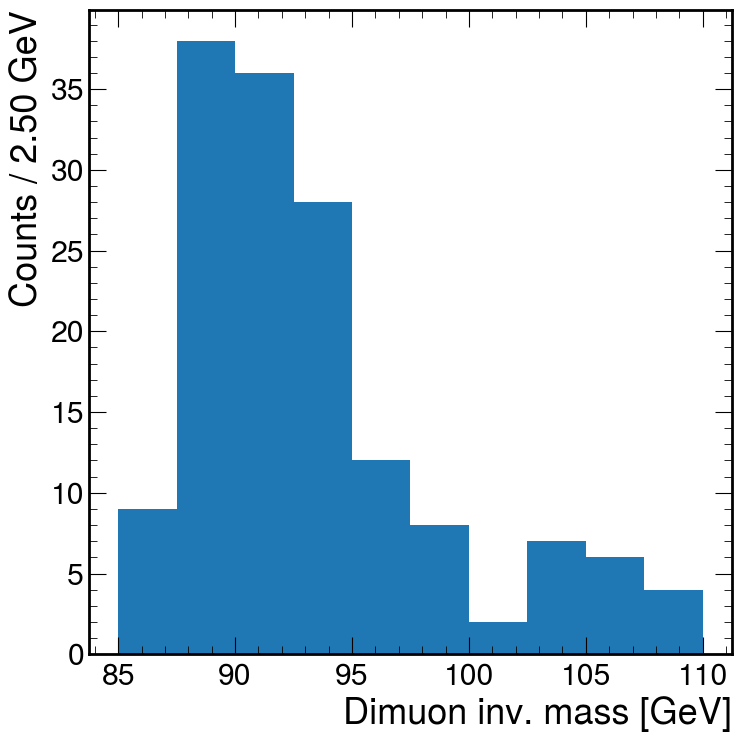

In [31]:
plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 10, 85, 110
plt.hist(ak.flatten(branches['B_Ups2_mass']), bins=nbins, range=(xlow, xhigh))
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.xlabel("Dimuon inv. mass [GeV]")
plt.tight_layout()

In [24]:
# concatenate the muons
B_J_mass = ak.concatenate([branches['B_J1_mass'], branches['B_J2_mass'], branches['B_J3_mass'], branches['B_J4_mass']], axis=0)

In [25]:
nbins, xlow, xhigh = 100, 70, 110
B_J_mass_candidates = ak.flatten(B_J_mass).to_numpy()
mass = ROOT.RooRealVar("B_J_mass", "DiMuon mass", xlow, xhigh, "GeV")
data = ROOT.RooDataSet.from_numpy({'B_J_mass': B_J_mass_candidates}, [mass])

[#0] WARNING:DataHandling -- RooDataSet.from_numpy() Ignored 413 out-of-range events


[#1] INFO:Minimization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (background,gaussian)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 a0           1.00000e-01  2.00000e+00   -1.00000e+01  1.00000e+01
     2 a1           1.00000e-01  2.00000e+00   -1.00000e+01  1.00000e+01
     3 a2           1.00000e-01  2.00000e+00   -1.00000e+01  1.00000e+01
     4 mean         9.10000e+01  2.00000e+00    8.00000e+01  1.00000e+02
     5 nbkg         1.00000e+04  2.50000e+03    0.00000e+00  2.50000e+04
     6 nsig         1.50000e+04  2.50000e+03    0.00000e+00  2.50000e+04
     7 sigma        2.00000e+00  9.50000e-01    1.00000e-01

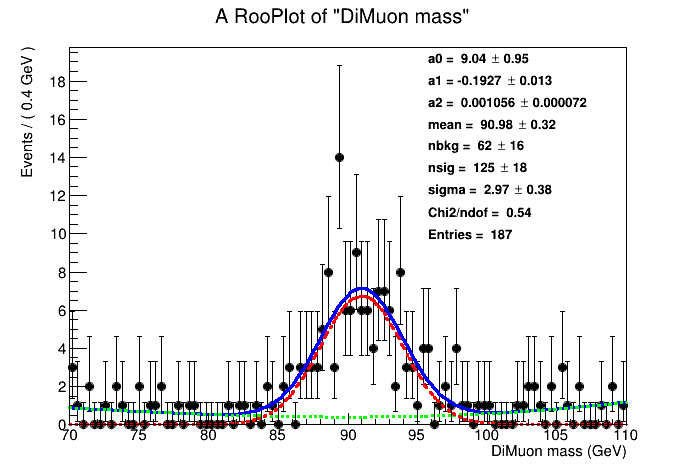

In [26]:
frame = fit_unbinned_gauss_Z_with_background(data, mass, nbins)

# Draw the frame on the canvas
canvas = ROOT.TCanvas("canvas", "Z Candidates")
frame.Draw()
canvas.Draw()

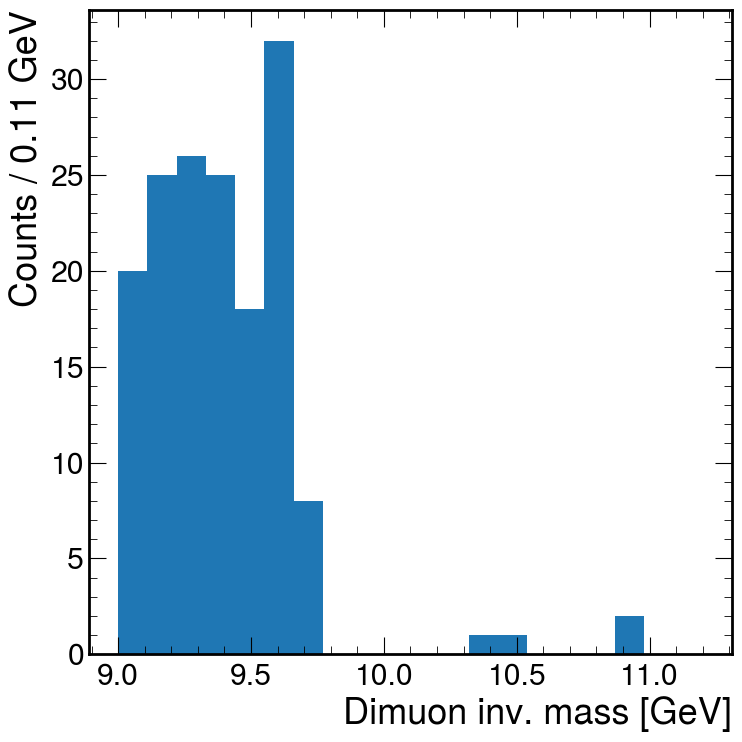

In [28]:
plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 20, 9, 11.2
plt.hist(ak.flatten(B_J_mass), bins=nbins, range=(xlow, xhigh))
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.xlabel("Dimuon inv. mass [GeV]")
plt.tight_layout()

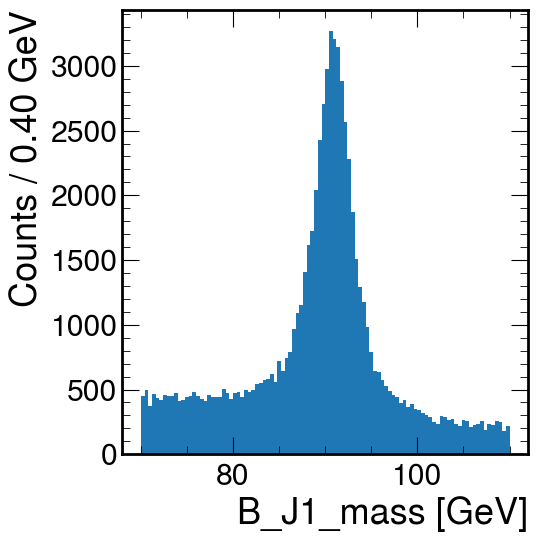

In [54]:
plt.figure(figsize=(6, 6))
nbins, xlow, xhigh = 100, 70, 110
plt.hist(ak.flatten(branches['B_J1_mass']), bins=nbins, range=(xlow, xhigh))
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.xlabel("B_J1_mass [GeV]")
plt.tight_layout()

In [ ]:
plt.figure(figsize=(6, 6))
nbins, xlow, xhigh = 10, 60, 120
plt.hist(ak.flatten(branches['B_J1_mass']), bins=nbins, range=(xlow, xhigh))
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.xlabel("B_J1_mass [GeV]")
plt.tight_layout()